In [1]:
from functools import partial
import pickle as pkl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

In [2]:
fname = os.environ["PROJECT_DIR"] + "/resources/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs = df_alignment(df_obs)

In [3]:
os.chdir("/home/peisenha/structExpectations/development/estimations/exploration_peisenha_drop_high")

In [4]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value     upper       lower  fixed
category      name                                                
const_wage_eq gamma_0s1      1.894936     3.700    1.380000   True
              gamma_0s2      1.923508     3.700    1.380000   True
              gamma_0s3      2.212359     3.700    1.380000   True
exp_returns   gamma_1s1      0.151907     0.500    0.001000   True
              gamma_1s2      0.232615     0.500    0.001000   True
              gamma_1s3      0.256144     0.500    0.001000   True
exp_accm      g_s1           0.100000     0.500    0.001000   True
              g_s2           0.200000     0.500    0.001000   True
              g_s3           0.250000     0.500    0.001000   True
exp_deprec    delta_s1       0.020000     0.200    0.001000   True
              delta_s2       0.020000     0.200    0.001000   True
              delta_s3       0.020000     0.200    0.001000   True
hetrg_unobs   theta_p1       0.000000    -0.000   -0.103099   True
              theta_f1       0.000000    -0.000   -0.134978   True
shares        share_1        0.000000     0.950   -0.001000   True
sd_wage_shock sigma_1        0.389763     1.000    0.001000   True
              sigma_2        0.439060     1.000    0.001000   True
disutil_work  no_kids_f      0.222039     2.000    0.001000  False
              no_kids_p     -0.200625    -0.001   -1.500000  False
              yes_kids_f     0.908254     2.000    0.001000  False
              yes_kids_p    -0.715843    -0.001   -1.500000  False
              child_02_f     0.108120     0.200    0.001000   True
              child_02_p    -0.018120    -0.001   -1.500000   True
              child_35_f     0.013053     0.200    0.001000   True
              child_35_p    -0.048731    -0.001   -1.500000   True
              child_610_f    0.005738     0.200    0.001000   True
              child_610_p   -0.126447    -0.001   -1.500000   True
benefits_base              200.000000  1000.000  100.000000   True
delta                        0.980000     0.990    0.900000   True
mu                          -0.560000    -0.990   -0.010000   True

In [5]:
model_params_step = pd.read_pickle("step.soepy.pkl")

In [6]:
model_params_step

value     upper       lower  fixed
category      name                                                
const_wage_eq gamma_0s1      1.798037     3.700    1.380000  False
              gamma_0s2      1.997531     3.700    1.380000  False
              gamma_0s3      1.801828     3.700    1.380000  False
exp_returns   gamma_1s1      0.180045     0.500    0.001000  False
              gamma_1s2      0.196062     0.500    0.001000  False
              gamma_1s3      0.407967     0.500    0.001000  False
exp_accm      g_s1           0.100000     0.500    0.001000   True
              g_s2           0.200000     0.500    0.001000   True
              g_s3           0.250000     0.500    0.001000   True
exp_deprec    delta_s1       0.020000     0.200    0.001000   True
              delta_s2       0.020000     0.200    0.001000   True
              delta_s3       0.020000     0.200    0.001000   True
hetrg_unobs   theta_p1       0.000000    -0.000   -0.103099   True
              theta_f1       0.000000    -0.000   -0.134978   True
shares        share_1        0.000000     0.950   -0.001000   True
sd_wage_shock sigma_1        0.389763     1.000    0.001000   True
              sigma_2        0.439060     1.000    0.001000   True
disutil_work  no_kids_f      0.178390     2.000    0.001000  False
              no_kids_p     -0.205094    -0.001   -1.500000  False
              yes_kids_f     0.928109     2.000    0.001000  False
              yes_kids_p    -0.835517    -0.001   -1.500000  False
              child_02_f     0.108120     0.200    0.001000   True
              child_02_p    -0.018120    -0.001   -1.500000   True
              child_35_f     0.013053     0.200    0.001000   True
              child_35_p    -0.048731    -0.001   -1.500000   True
              child_610_f    0.005738     0.200    0.001000   True
              child_610_p   -0.126447    -0.001   -1.500000   True
benefits_base              200.000000  1000.000  100.000000   True
delta                        0.980000     0.990    0.900000   True
mu                          -0.560000    -0.990   -0.010000   True

In [7]:
df_sim_step = soepy.simulate(model_params_step, "resources/model_spec_init.yml")
df_sim_step = df_alignment(df_sim_step)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


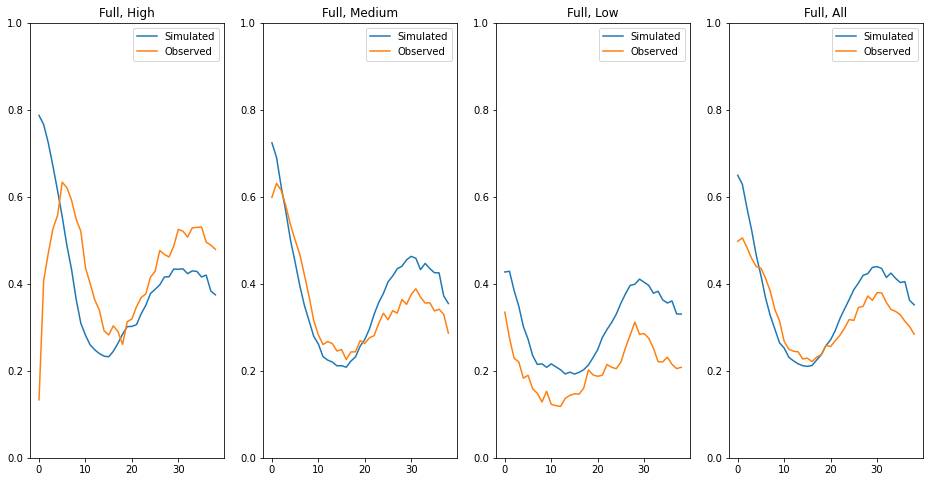

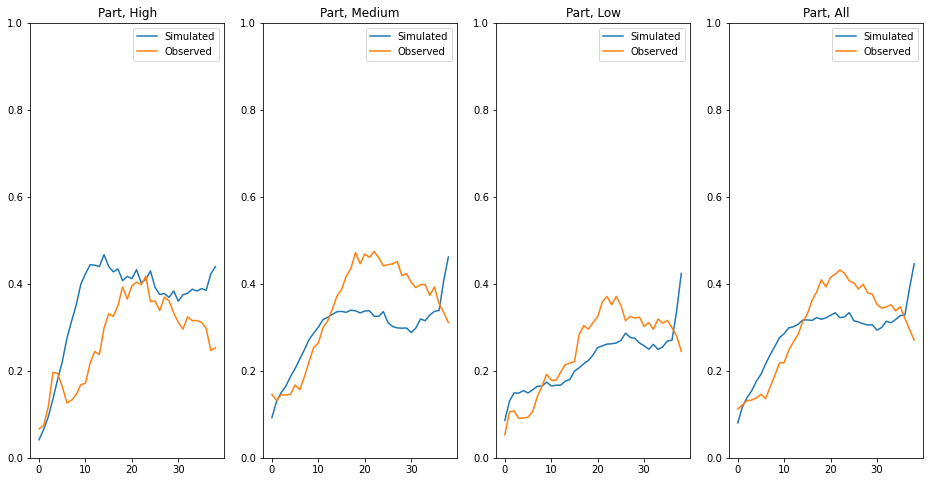

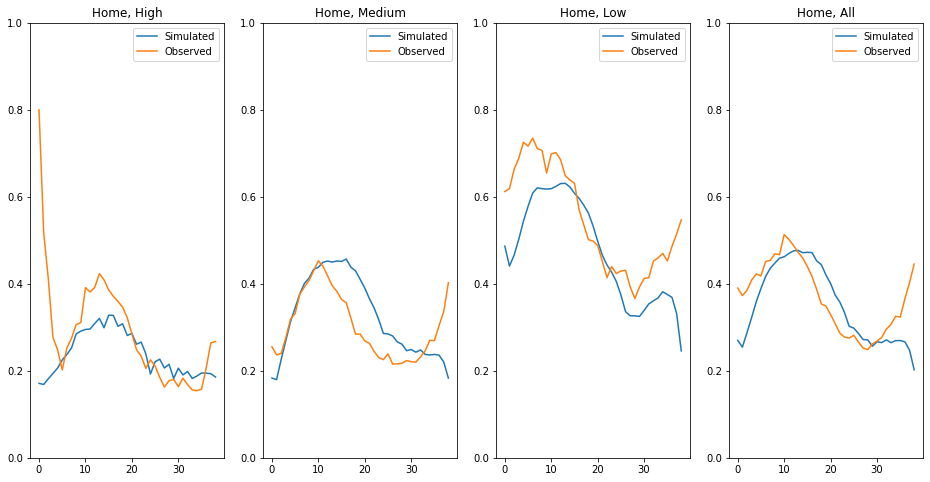

In [8]:
plot_basics_choices(df_sim=df_sim_step, df_obs=df_obs)

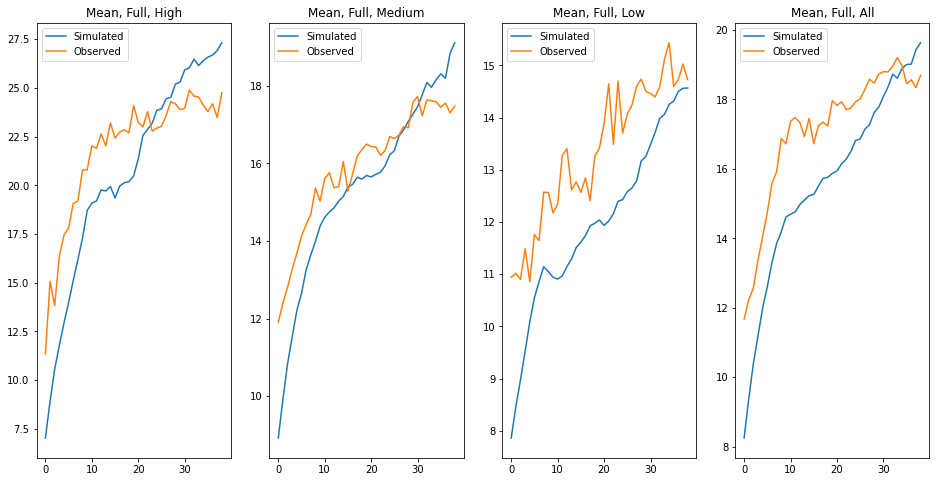

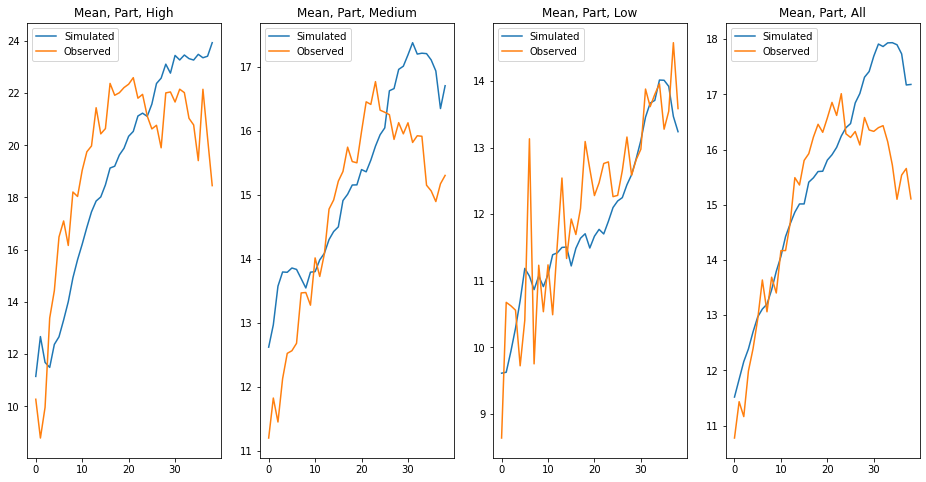

In [9]:
plot_basics_wages(df_sim=df_sim_step, df_obs=df_obs)